### Proyecto Final 
#### Movimiento Browniano y Ecuación de Calor

#### Simulación Estocástica: Teoría y Laboratorio

##### Integrantes: Maximiliano S. Beltrán - David Astudillo M.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy.random import normal
import time

#### Solución Analítica.

##### Ecuación de Calor (Caso Analítico)
Consideramos la formulación 
$$\begin{cases}
u_t (x,t) -  ku_{xx}(x,t) = 0 & \mathbb{R} \times (0,\infty) \\
u(x,0) = \delta(x) \\
\end{cases}$$

Definimos la solución fundamental al problema (kernel de calor) de manera que 

$$\Phi(t,x) = \frac{1}{\sqrt{4 \pi k t}} \exp(\frac{x^2}{4kt}) $$

De manera que para la formulación con condición inicial

$$\begin{cases}
u_t (x,t) -  ku_{xx}(x,t) = 0 & \mathbb{R} \times (0,\infty) \\
u(x,0) = g(x) \\
\end{cases}$$

Se tiene que

$$u(x,t) = \int_{\mathbb{R}} \Phi(x-y,t)g(y)dy$$

es una solución del problema

##### Comentario

Se puede extender para el caso en $R^{n}$, tenemos la formulación 

$$\begin{cases}
u_t (x,t) -  k \Delta u (x,t) = 0 & \mathbb{R}^{n} \times (0,\infty) \\
u(x,0) = \delta(x), x \in \mathbb{R}^{n} \\
\end{cases}$$

La solución n-fundamental viene dada por el producto de las soluciones en cada variable,

$$\Phi_{n}(x,t) = \Phi(x_1,t) \dots \Phi(x_n,t) = \frac{1}{\sqrt{(4 \pi k t)^{n}}} exp(-\frac{|x|^2}{4kt})$$

Y entonces, el problema general

$$\begin{cases}
u_t (x,t) -  k \Delta u (x,t) = 0 & \mathbb{R}^{n} \times (0,\infty) \\
u(x,0) = g(x), x \in \mathbb{R}^{n} \\
\end{cases}$$

tiene solución 

$$u(x,t) = \int_{\mathbb{R}^{n}}\Phi(x-y,t)g(y)dy$$

#### Observaciones
Para la ecuación en $\mathbb{R}$ con parámetro $k = \frac{1}{2}$ tenemos el kernel de calor
$$\Phi(x,t) = \frac{1}{\sqrt{2 \pi t}}exp(-\frac{x^2}{2t})$$

#### Caso 1-dimensional

#### Contexto Browniano

El movimiento Browniano es un proceso de Markov en el sentido que
$$\mathbb{P}(B_{t+s} \in A | B_u , u \leq s) = \mathbb{P}(B_{t+s} \in A | B_s)$$
siendo la función de transición
$$\hat{p}(t;x,A) = \mathbb{P}(B_{t+s} \in A | B_s = x) = \frac{1}{\sqrt{2 \pi t}} \int_{A} e^{-(x-y)^2 /2t} dy$$

y función de densidad de transición
$$ p(t;x,y) = \frac{1}{\sqrt{2 \pi t}} e^{-(x-y)^2/2t} , t>0 , x,y \in \mathbb{R}$$

la cual proporciona la probabilidad de alcanzar en un tiempo $t$ desde la posición $x$ al conjunto $A$

##### Observación
Notar que 
$$\Phi(x-y,t) = p(t;x,y)$$
y por lo tanto
$$u(t,x) = \int_{\mathbb{R}} g(y) p(t;x,y) dy$$

Buscamos solucionar la formulación
\begin{equation}
    \begin{cases}
            \dfrac{\partial u}{\partial t} = \dfrac{1}{2}\dfrac{\partial^2 u}{\partial x^2} & \mathbb{R} \times (0,\infty) \\
            u(0,x) = f(x)      & \forall x \in \mathbb{R} \\
            \end{cases} 
 \end{equation}

Haciendo uso del Movimiento Browniano Estándar 

El siguiente teorema entrega las justificaciones teóricas del experimento

$\textbf{Teorema (Representación de soluciones)}$
Sea $f : \mathbb{R} \rightarrow \mathbb{R}$ una función continua Borel-medible tal que 
  $$\int_{-\infty}^{+\infty} e^{-ax^2} |f(x)|dx < 0$$
  para algún $a>0$. Entonces
  $$\hat{u}(t,x) \overset{\Delta}{=} \mathbb{E}^{x} [f(B_t)] = \int_{- \infty}^{+\infty} f(y)p(t;x,y)dy$$
  está definida para $0<t<\frac{1}{2a}$, $x \in \mathbb{R}$ y es tal que soluciona la ecuación del calor, además $u \in \mathcal{C}^{\infty} (\mathbb{R})$

Por lo tanto podemos hacer uso de Monte Carlo

In [3]:
#Browniano
def Bt(N, T, K,ty=False):
    step = T/K
    t = list(map(lambda r: r*step,range(0, K+1)))
    B = np.zeros((N, K+1))
    normals = normal(size=(N, K+1))
    for i in range(1, K+1):
        B[:, i] = B[:, i-1] + np.sqrt(step) * normals[:, i]
    if ty:
        return B
    return B[:,-1]

def heat1d(f,x,Bt):
    return np.mean(f(Bt+x))

def heat2d(f,x,y,Bt1,Bt2):
    ef=[]
    for i in range(len(Bt1)):
        ef.append(f(Bt1[i]+x,Bt2[i]+y)) 
    return np.mean(ef)

def ftheat1d(f,X,t,N,h):
    K=np.int32(np.ceil(t/h))
    B=Bt(N,t,K)
    ftx=np.zeros(len(X))
    hx=0
    for x in X:
        ftx[hx]=heat1d(f,x,B)
        hx+=1
    return ftx

def ftheat2d(f,X,Y,t,N,h):
    K=np.int32(np.ceil(t/h))
    B1=Bt(N,t,K)
    B2=Bt(N,t,K)
    ftx=np.zeros([len(X),len(Y)])
    hx=0
    hy=0
    for x in X:
        for y in Y:
            ftx[hx][hy]=heat2d(f,x,y,B1,B2)
            hy+=1
        hy=0
        hx+=1
    return ftx

#Funciones 
def gaussiana1d(x):
    return np.exp(-x**2)

def gaussiana2d(x,y):
    return 100*np.exp(-x**2-y**2)

def funciontest(x):
    return np.cos(x)

def wave(x,y):
    return np.sin(x)*np.sin(y)*np.exp(-x**2-y**2)

def absolutewave(x,y):
    return np.absolute(np.sin(x)*np.sin(y)*np.exp(-x**2-y**2))

def absolute(x):
    return np.absolute(np.cos(x))

#### Simulación del problema en R.


<IPython.core.display.Javascript object>


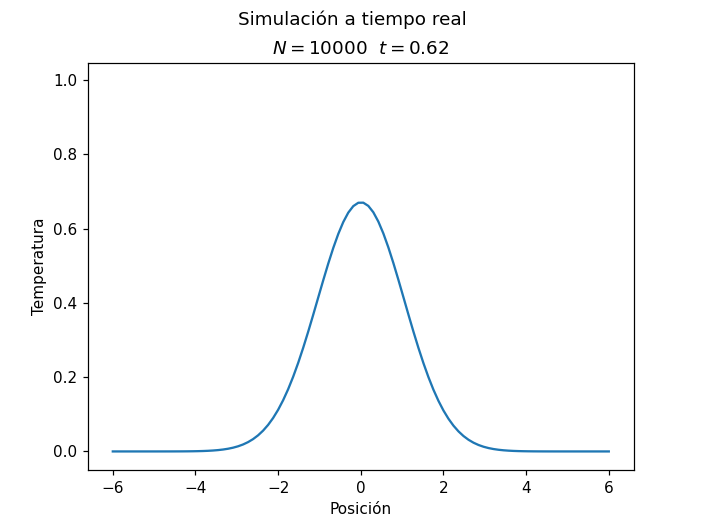

In [4]:
# Setting inicial
# N de Brownianos, tolerancias, y cambios en tiempo
%matplotlib notebook
N=10000
h=0.01
dt=0.01
t=0.001
x = np.linspace(-6, 6, 100)
ground_state = ftheat1d(gaussiana1d,x,t,N,h)
plt.ion()
plt.ion()

#Simulacion en tiempo real
def simulate(*args):
    global ground_state
    global t
    ground_state = ftheat1d(gaussiana1d,x,t,N,h)
    t+=dt

simulate()

fig, ax = plt.subplots()
line1, = ax.plot(x, ground_state)
#plt.rcParams['figure.dpi'] = 300
#im = plt.imshow(ground_state, animated = True,cmap='Greys')
#im.title('W')

def update_fig(*args):
    global ground_state
    simulate(ground_state, 1000, 2.1)
    # updating data values
    line1.set_xdata(x)
    line1.set_ydata(ground_state)
    plt.suptitle('Simulación a tiempo real')
    plt.xlabel("Posición")
    plt.ylabel("Temperatura")
    plt.title(r'$N=$'+str(N)+r'  $t =$'+str("{:.2f}".format(t)))
    return line1

ani = animation.FuncAnimation(fig, update_fig, interval = 0.1,save_count=100)
plt.show();
#ani.save("heat1d.mp4",fps=10)

#### Comentario
Como es esperado, la barra va distribuyendo la temperatura de manera simétrica respecto del eje x, esto es $\lim_{t \rightarrow \infty} u(t,x) = 0$, $\forall x \in \mathbb{R}$

<IPython.core.display.Javascript object>


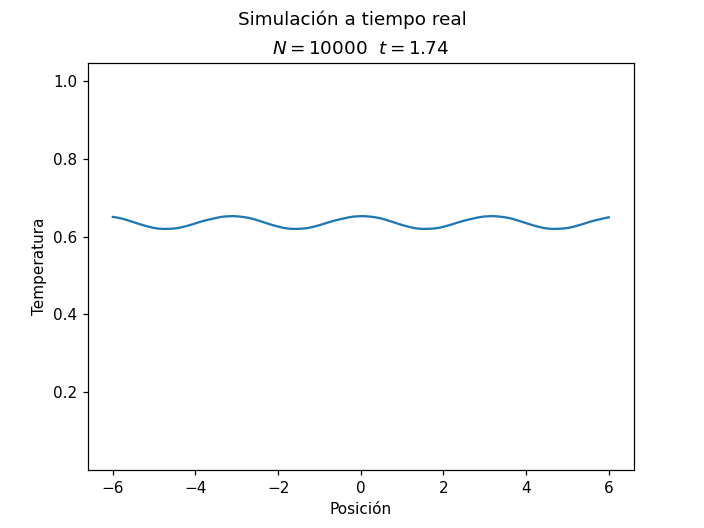

In [5]:
# Setting inicial
# N de Brownianos, tolerancias, y cambios en tiempo
%matplotlib notebook
N=10000
h=0.01
dt=0.01
t=0.001
x = np.linspace(-6, 6, 100)
ground_state = ftheat1d(gaussiana1d,x,t,N,h)
plt.ion()
plt.ion()

#Simulacion en tiempo real
def simulate(*args):
    global ground_state
    global t
    ground_state = ftheat1d(absolute,x,t,N,h)
    t+=dt

simulate()

fig, ax = plt.subplots()
line1, = ax.plot(x, ground_state)
#plt.rcParams['figure.dpi'] = 300
#im = plt.imshow(ground_state, animated = True,cmap='Greys')
#im.title('W')

def update_fig(*args):
    global ground_state
    simulate(ground_state, 1000, 2.1)
    # updating data values
    line1.set_xdata(x)
    line1.set_ydata(ground_state)
    plt.suptitle('Simulación a tiempo real')
    plt.xlabel("Posición")
    plt.ylabel("Temperatura")
    plt.title(r'$N=$'+str(N)+r'  $t =$'+str("{:.2f}".format(t)))
    return line1

ani = animation.FuncAnimation(fig, update_fig, interval = 0.1,save_count=100)
plt.show();
#ani.save("heat1d.mp4",fps=10)

#### Comentario

Tomamos la función $f(x) = |cos(x)|$, notamos que dicha función es simétrica respecto del 0, está definida positiva, y está modelando una barra la cual varía regularmente su temperatura respecto a la posición, esperamos que está converga a un promedio de la temperatura para toda la barra a lo largo del tiempo.

Sin perdida de generalidad notemos que para el intervalo $[-2 \pi,2 \pi]$ (para $\mathbb{R}$ tomamos límite sobre $[-r,r]$ con $r \rightarrow \infty$)  el valor promedio de temperatura está dado por

$$\frac{1}{4\pi} \int_{-2\pi}^{2\pi} |cos(x)|dx = \frac{8}{4\pi} \approx 0.6366$$

En la simulación notamos como la temperatura de la barra converge cuando $t \rightarrow \infty$ a una temperatura constante en cada punto $\lim_{t \rightarrow \infty} u(t,x) \approx 0.6366$, $\forall x \in \mathbb{R}$

#### Extensión para el caso 2-dimensional

Consideramos ahora la formulación 
$$
\begin{equation}
    \begin{cases}
            \dfrac{\partial u}{\partial t} = \dfrac{1}{2} \Delta_{x} u & \mathbb{R}^2 \times (0,\infty) \\
            u(0,x,y) = f(x,y)      & \forall (x,y) \in \mathbb{R}^2 \\
            \end{cases} 
 \end{equation}
 $$

##### Simulación 
Consideramos condición inicial $$f(x,y) = e^{-x^2-y^2}$$

<IPython.core.display.Javascript object>


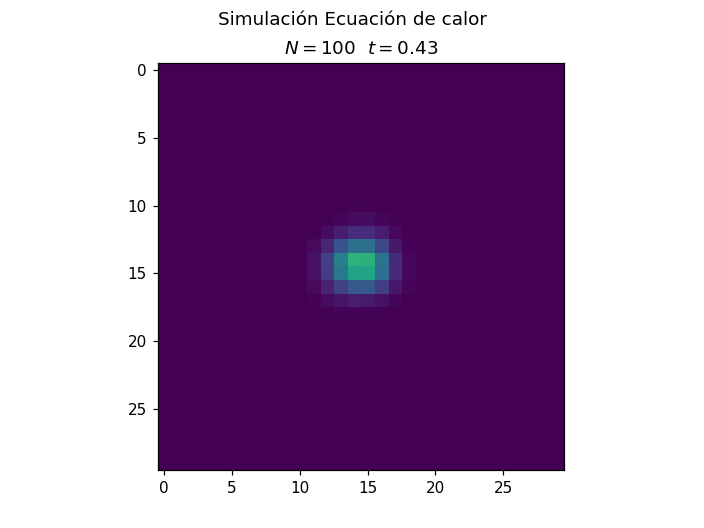

In [43]:
# Setting inicial
# N de Brownianos, tolerancias, y cambios en tiempo
%matplotlib notebook
N=100
h=0.1
dt=0.01
t=0.001
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)
ground_state = ftheat2d(gaussiana2d,x,y,t,N,h)

#Simulacion en tiempo real
def simulate(*args):
    global ground_state
    global t
    ground_state = ftheat2d(gaussiana2d,x,y,t,N,h)
    t+=dt

simulate()

fig = plt.figure()
#plt.rcParams['figure.dpi'] = 300
im = plt.imshow(ground_state, animated = True)
#im.title('W')

def update_fig(*args):
    global ground_state
    simulate(ground_state, 1000, 2.1)
    im.set_data(ground_state)
    plt.suptitle('Simulación Ecuación de calor')
    plt.title(r'$N=$'+str(N)+r'  $t =$'+str("{:.2f}".format(t)))
    return im

ani = animation.FuncAnimation(fig, update_fig, interval = 0.01,save_count=100)
plt.show();
#ani.save("Bisisng75001.mp4",fps=60)

#### Comentario
Notamos como el calor se distribuye de forma simétrica como es esperado, puesto que tomamos f condición inicial como una función radial.

También vemos que el requerimiento computacional aumenta bastante para la presentación de simulaciones frente al caso 1-dimensional.

##### Simulación
Consideramos condicion inicial
$$f(x,y) = |sin(x)sin(y)e^{-x^2-y^2}|$$

<IPython.core.display.Javascript object>


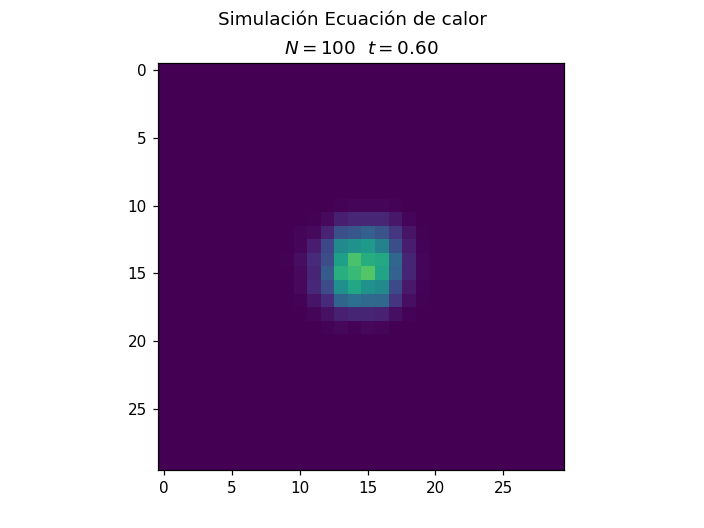

In [40]:
# Setting inicial
# N de Brownianos, tolerancias, y cambios en tiempo
%matplotlib notebook
N=100
h=0.1
dt=0.01
t=0.001
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)
ground_state = ftheat2d(absolutewave,x,y,t,N,h)

#Simulacion en tiempo real
def simulate(*args):
    global ground_state
    global t
    ground_state = ftheat2d(absolutewave,x,y,t,N,h)
    t+=dt

simulate()

fig = plt.figure()
#plt.rcParams['figure.dpi'] = 300
im = plt.imshow(ground_state, animated = True)
#im.title('W')

def update_fig(*args):
    global ground_state
    simulate(ground_state, 1000, 2.1)
    im.set_data(ground_state)
    plt.suptitle('Simulación Ecuación de calor')
    plt.title(r'$N=$'+str(N)+r'  $t =$'+str("{:.2f}".format(t)))
    return im

ani = animation.FuncAnimation(fig, update_fig, interval = 0.01,save_count=100)
plt.show();
#ani.save("Bisisng75001.mp4",fps=60)

#### Comentario

No se logra apreciar bien el comportamiento para esta condición inicial debido a que el exceso de rejillar para la simulación requiere demasiado trabajo computacional, sin embargo se logra observar como se dispersa el calor y como va moviendose el punto de mayor temperatura en torno al centro